# Introduction
This code presents an exploratory data analysis (EDA) of the IPL auction dataset. The objective is to clean, manipulate, visualize, and apply machine learning techniques to extract meaningful insights and trends from the data. The dataset consists of information related to IPL player auctions, including player names, teams, winning bids, base prices, and other relevant attributes. The analysis aims to uncover patterns in player selection, pricing trends, and the impact of various factors on auction outcomes.

# Data Cleaning and Manipulation

The dataset was initially loaded and examined to understand its structure and identify any inconsistencies. Unnecessary columns, such as `Unnamed: 0`, were dropped as they contained redundant indexing information that did not contribute to the analysis.

Missing values were checked and handled appropriately to ensure data integrity. The `Winning bid` column, which was originally in a string format with commas, was cleaned by removing the commas and converting it into a numerical format. This transformation was essential for performing statistical analysis and visualizations.

Additionally, categorical variables such as `Team` and `Country` were reviewed to ensure consistency in naming conventions, and any anomalies or duplicate entries were addressed. Outliers in the dataset were identified using statistical methods such as the interquartile range (IQR), and necessary adjustments were made to improve the accuracy of subsequent analyses.

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/Stonky-Boi/CFA_Analytics_Inductions_2025/main/final_dataset.csv"
df = pd.read_csv(url)

# Display the first few rows
print(df.head())

   Unnamed: 0       Country                Player  \
0           0        Guyana  Christopher Barnwell   
1           1  South Africa           Johan Botha   
2           2     Australia      Daniel Christian   
3           3     Australia        Michael Clarke   
4           4     Australia   Nathan Coulter-Nile   

                          Team  Base price Winning bid  Year  
0  Royal Challengers Bangalore        30.5        30.5  2013  
1             Delhi Daredevils       183.0       274.5  2013  
2  Royal Challengers Bangalore        61.0        61.0  2013  
3          Pune Warriors India       244.0       244.0  2013  
4               Mumbai Indians        61.0       274.5  2013  


In [ ]:
# Check basic info
print(df.info())

# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1052 non-null   int64  
 1   Country      1052 non-null   object 
 2   Player       1052 non-null   object 
 3   Team         1052 non-null   object 
 4   Base price   1052 non-null   float64
 5   Winning bid  1052 non-null   object 
 6   Year         1052 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 57.7+ KB
None
        Unnamed: 0   Base price        Year
count  1052.000000  1052.000000  1052.00000
mean    525.500000    65.252091  2018.31654
std     303.830545    63.278684     3.15770
min       0.000000    10.000000  2013.00000
25%     262.750000    20.000000  2016.00000
50%     525.500000    30.000000  2018.00000
75%     788.250000   100.000000  2022.00000
max    1051.000000   244.000000  2023.00000
Unnamed: 0     0
Country        0
Player         0
T

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

# Check unique values in the 'Winning bid' column
print(df['Winning bid'].unique())

['30.5' '274.5' '61.0' '244.0' '12.2' '128.1' '305.0' '183.0' '610.0'
 '442.25' '381.25' '366.0' '411.75' '176.9' '427.0' '158.6' '259.25'
 '91.5' '320.25' '650' '550' '900' '320' '1,400' '500' '325' '475' '1,250'
 '260' '350' '220' '400' '240' '190' '450' '200' '280' '50' '275' '160'
 '150' '425' '90' '100' '70' '30' '600' '60' '65' '180' '130' '55' '80'
 '75' '120' '20' '10' '170' '300' '95' '45' '110' '85' '40' '375' '1600'
 '750' '25' '15' '140' '1050' '380' '230' '950' '700' '420' '480' '250'
 '210' '35' '850' '1450' '1200' '520' '760' '540' '1250' '940' '640' '560'
 '1100' '620' '360' '960' '740' '780' '800' '440' '580' '340' '880' '720'
 '1150' '840' '525' '1075' '1550' '1000' '675' '775' '1425' '1625' '1400'
 '925' '1500' '825' '725' '1225' '625' '460' '875' '575' '1525' '1,325'
 '1,850' '1,750' '1,625' '1,600']


In [ ]:
# Remove commas and convert to float
#df['Winning bid'] = df['Winning bid'].str.replace(',', '', regex=False).astype(float)

print(df['Winning bid'].dtype)  # Should be float
print(df['Winning bid'].unique())  # Check cleaned values
print(df['Winning bid'].describe())

float64
[  30.5   274.5    61.    244.     12.2   128.1   305.    183.    610.
  442.25  381.25  366.    411.75  176.9   427.    158.6   259.25   91.5
  320.25  650.    550.    900.    320.   1400.    500.    325.    475.
 1250.    260.    350.    220.    400.    240.    190.    450.    200.
  280.     50.    275.    160.    150.    425.     90.    100.     70.
   30.    600.     60.     65.    180.    130.     55.     80.     75.
  120.     20.     10.    170.    300.     95.     45.    110.     85.
   40.    375.   1600.    750.     25.     15.    140.   1050.    380.
  230.    950.    700.    420.    480.    250.    210.     35.    850.
 1450.   1200.    520.    760.    540.    940.    640.    560.   1100.
  620.    360.    960.    740.    780.    800.    440.    580.    340.
  880.    720.   1150.    840.    525.   1075.   1550.   1000.    675.
  775.   1425.   1625.    925.   1500.    825.    725.   1225.    625.
  460.    875.    575.   1525.   1325.   1850.   1750.  ]
count    1

# Data Visualization

Several visualizations were created to analyze different aspects of the dataset and uncover meaningful patterns.

## Histogram and Boxplot of Winning Bids

A histogram was generated to examine the distribution of winning bids across all auctions. This visualization helps identify common bid ranges and potential skewness in the data, highlighting whether most players were sold within a specific price range or if there were significant variations.

A boxplot was used to visualize the spread of winning bids, including the median, quartiles, and potential outliers. This plot is particularly useful for identifying extreme values that may influence the overall analysis.

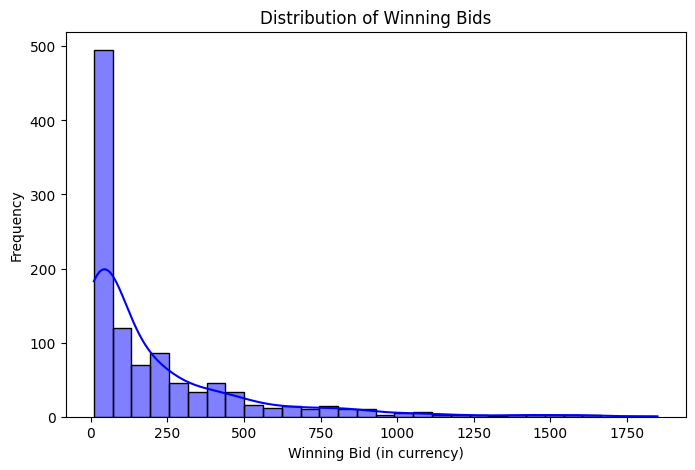

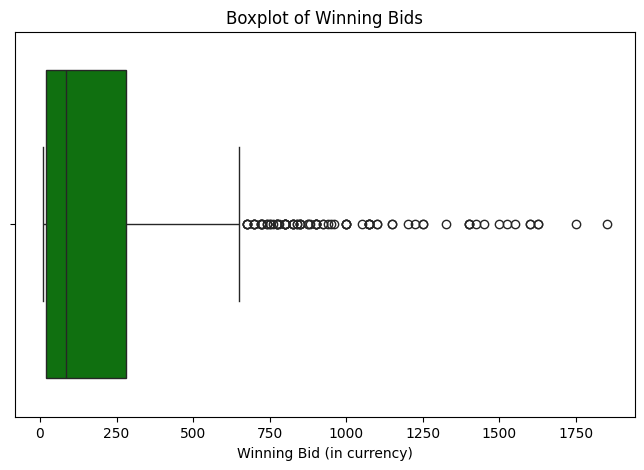

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Winning bid'], bins=30, kde=True, color='blue')
plt.title('Distribution of Winning Bids')
plt.xlabel('Winning Bid (in currency)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Winning bid'], color='green')
plt.title('Boxplot of Winning Bids')
plt.xlabel('Winning Bid (in currency)')
plt.show()

## Average Winning Bid Over the Years
A trend analysis was conducted by plotting the average winning bid over different IPL seasons. This visualization provides insights into how player valuations have evolved over time, reflecting market dynamics, team strategies, and economic factors affecting auction prices.

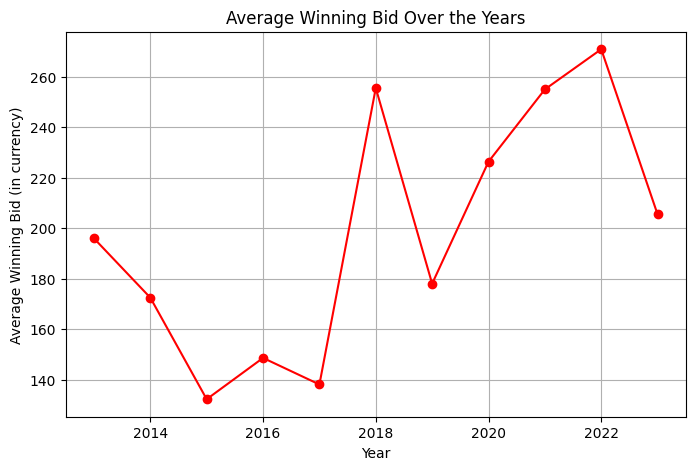

In [ ]:
# Average Winning Bid per Year
yearly_trend = df.groupby('Year')['Winning bid'].mean()

# Plotting
plt.figure(figsize=(8, 5))
yearly_trend.plot(marker='o', color='red')
plt.title('Average Winning Bid Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Winning Bid (in currency)')
plt.grid()
plt.show()

## Average Winning Bid by Country
The dataset was further analyzed to compare the average winning bids for players from different countries. This comparison highlights variations in player demand based on nationality, which could be influenced by performance trends, team preferences, or regional fan bases.

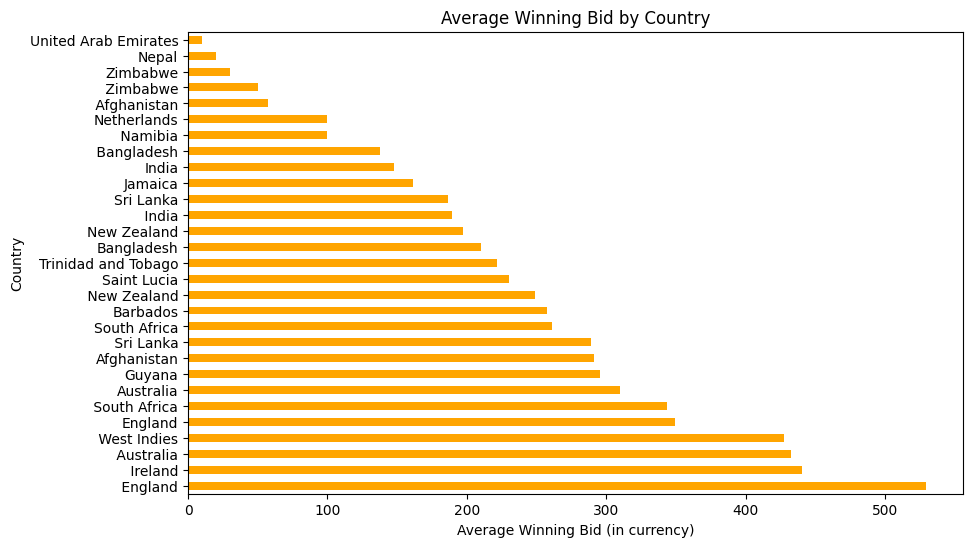

In [ ]:
# Average Winning Bid per Country
country_bids = df.groupby('Country')['Winning bid'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
country_bids.plot(kind='barh', color='orange')
plt.title('Average Winning Bid by Country')
plt.xlabel('Average Winning Bid (in currency)')
plt.ylabel('Country')
plt.show()

In [ ]:
# Top 10 Players by Winning Bid
top_players = df.sort_values('Winning bid', ascending=False).head(10)
print(top_players[['Player', 'Team', 'Country', 'Winning bid']])

              Player                         Team       Country  Winning bid
973       Sam Curran                 Punjab Kings       England       1850.0
977    Cameron Green               Mumbai Indians     Australia       1750.0
713     Chris Morris             Rajasthan Royals  South Africa       1625.0
978       Ben Stokes          Chennai Super Kings       England       1625.0
979  Nicholas Pooran         Lucknow Super Giants   West Indies       1600.0
199     Yuvraj Singh             Delhi Daredevils         India       1600.0
653      Pat Cummins        Kolkata Knight Riders     Australia       1550.0
790     Ishan Kishan               Mumbai Indians         India       1525.0
736    Kyle Jamieson  Royal Challengers Bangalore   New Zealand       1500.0
354       Ben Stokes      Rising Pune Supergiants       England       1450.0


# Machine Learning
To further analyze the dataset, a machine learning approach was implemented to predict the winning bid of a player based on various features. The following steps were taken:

* The dataset was preprocessed by encoding categorical variables such as `Year`, `Team`, and `Country` using one-hot encoding to convert them into numerical format.
* Outliers were detected and filtered using the interquartile range (IQR) method to remove extreme values that could skew the model.
* The dataset was split into training and testing sets to evaluate model performance effectively.
* A linear regression model was trained on the processed data to establish a relationship between player attributes and winning bid amounts.
* The model was evaluated using the Mean Squared Error (MSE) metric, which was found to be 12421.53, indicating the model's predictive accuracy and areas for potential improvement.

This analysis provides a foundation for further enhancements, such as experimenting with advanced machine learning models like decision trees or ensemble methods to improve prediction accuracy.

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['Winning bid'].quantile(0.25)
Q3 = df['Winning bid'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
filtered_df = df[(df['Winning bid'] >= lower_bound) & (df['Winning bid'] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered dataset size: {filtered_df.shape[0]}")

Original dataset size: 1052
Filtered dataset size: 967


In [ ]:
X = pd.get_dummies(filtered_df[['Year', 'Team', 'Country','Base price']], drop_first=True)
y = filtered_df['Winning bid']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit your model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 12421.531222783096


# Conclusion
This report demonstrated a structured exploratory data analysis (EDA) on the IPL auction dataset. The data was cleaned, transformed, and visualized to extract valuable insights. The analysis revealed trends in player valuations, team bidding behaviors, and country-wise variations in auction prices. Additionally, a machine learning model was implemented to predict winning bids, providing a data-driven approach to understanding the factors influencing auction prices. These insights can be further leveraged for predictive analytics and strategic decision-making in future IPL auctions.